In [1]:
import os
import numpy as np
import pickle
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from models.GAN import GAN

In [2]:
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'boson/'
RUN_FOLDER = '../run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [12]:
data_file = '../data/data.sav'

with open(data_file, "rb") as f:
    X, Y = pickle.load(f)
    
X = np.asarray(X)
Y = np.asarray(Y)

split = round(len(X)*.9)

x_train = X[:split]
y_train = Y[:split]

x_test  = X[split:]
y_test  = Y[split:]


In [26]:
#x_train.shape
y_train.shape

(3600, 35)

# Build a Dense Layer GAN

In [208]:
z_num = 16

gan = GAN(input_dim = (y_train.shape[1],)
        , discriminator_dense_layers = [64,64,32,128]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_dense_layers = [64,64,32,y_train.shape[1]]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = z_num
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [211]:
gan.discriminator.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 35)]              0         
_________________________________________________________________
discriminator_dense_0 (Dense (None, 64)                2304      
_________________________________________________________________
activation_82 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
discriminator_dense_1 (Dense (None, 64)                4160      
_________________________________________________________________
activation_83 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0  

In [212]:
gan.generator.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 16)]              0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 16)                64        
_________________________________________________________________
activation_86 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_g_layer_0 (Dense)      (None, 64)                1088      
_________________________________________________________________
batch_normalization_37 (Batc (None, 64)                256       
_________________________________________________________________
activation_87 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_g_layer_1 (Dense)      (None, 64)                416

In [214]:
BATCH_SIZE = 16
EPOCHS = 5000
PRINT_EVERY_N_BATCHES = 5

In [215]:
gan.train(     
    y_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

gan.save(RUN_FOLDER)

0 [D loss: (0.696)(R 0.695, F 0.698)] [D acc: (0.188)(0.188, 0.188)] [G loss: 0.693] [G acc: 0.500]
1 [D loss: (0.693)(R 0.693, F 0.693)] [D acc: (0.438)(0.562, 0.312)] [G loss: 0.717] [G acc: 0.188]
2 [D loss: (0.693)(R 0.694, F 0.691)] [D acc: (0.500)(0.375, 0.625)] [G loss: 0.719] [G acc: 0.125]
3 [D loss: (0.693)(R 0.694, F 0.692)] [D acc: (0.500)(0.438, 0.562)] [G loss: 0.719] [G acc: 0.000]
4 [D loss: (0.690)(R 0.695, F 0.685)] [D acc: (0.500)(0.312, 0.688)] [G loss: 0.720] [G acc: 0.062]
5 [D loss: (0.689)(R 0.695, F 0.684)] [D acc: (0.562)(0.312, 0.812)] [G loss: 0.739] [G acc: 0.000]
6 [D loss: (0.690)(R 0.696, F 0.684)] [D acc: (0.500)(0.188, 0.812)] [G loss: 0.740] [G acc: 0.000]
7 [D loss: (0.685)(R 0.696, F 0.674)] [D acc: (0.500)(0.000, 1.000)] [G loss: 0.763] [G acc: 0.000]
8 [D loss: (0.684)(R 0.696, F 0.672)] [D acc: (0.469)(0.000, 0.938)] [G loss: 0.787] [G acc: 0.000]
9 [D loss: (0.681)(R 0.698, F 0.664)] [D acc: (0.500)(0.000, 1.000)] [G loss: 0.799] [G acc: 0.000]


86 [D loss: (0.334)(R 0.659, F 0.010)] [D acc: (0.938)(0.875, 1.000)] [G loss: 8.748] [G acc: 0.000]
87 [D loss: (0.329)(R 0.647, F 0.011)] [D acc: (0.969)(0.938, 1.000)] [G loss: 6.472] [G acc: 0.000]
88 [D loss: (0.322)(R 0.625, F 0.018)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.080] [G acc: 0.000]
89 [D loss: (0.312)(R 0.617, F 0.007)] [D acc: (1.000)(1.000, 1.000)] [G loss: 8.440] [G acc: 0.000]
90 [D loss: (0.318)(R 0.618, F 0.018)] [D acc: (0.969)(0.938, 1.000)] [G loss: 6.946] [G acc: 0.000]
91 [D loss: (0.319)(R 0.630, F 0.008)] [D acc: (0.969)(0.938, 1.000)] [G loss: 8.498] [G acc: 0.000]
92 [D loss: (0.325)(R 0.623, F 0.026)] [D acc: (0.938)(0.875, 1.000)] [G loss: 9.906] [G acc: 0.000]
93 [D loss: (0.302)(R 0.596, F 0.009)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.104] [G acc: 0.000]
94 [D loss: (0.314)(R 0.602, F 0.026)] [D acc: (0.969)(0.938, 1.000)] [G loss: 8.452] [G acc: 0.000]
95 [D loss: (0.301)(R 0.595, F 0.006)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.938] [G ac

167 [D loss: (0.151)(R 0.297, F 0.005)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.811] [G acc: 0.000]
168 [D loss: (0.138)(R 0.277, F 0.000)] [D acc: (1.000)(1.000, 1.000)] [G loss: 11.610] [G acc: 0.000]
169 [D loss: (0.158)(R 0.316, F 0.000)] [D acc: (1.000)(1.000, 1.000)] [G loss: 11.215] [G acc: 0.000]
170 [D loss: (0.147)(R 0.285, F 0.008)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.941] [G acc: 0.000]
171 [D loss: (0.143)(R 0.286, F 0.001)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.274] [G acc: 0.000]
172 [D loss: (0.148)(R 0.296, F 0.000)] [D acc: (1.000)(1.000, 1.000)] [G loss: 11.348] [G acc: 0.062]
173 [D loss: (0.166)(R 0.305, F 0.026)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.104] [G acc: 0.000]
174 [D loss: (0.131)(R 0.259, F 0.003)] [D acc: (1.000)(1.000, 1.000)] [G loss: 11.424] [G acc: 0.000]
175 [D loss: (0.150)(R 0.299, F 0.001)] [D acc: (1.000)(1.000, 1.000)] [G loss: 11.717] [G acc: 0.000]
176 [D loss: (0.132)(R 0.255, F 0.009)] [D acc: (1.000)(1.000, 1.000)] [G

251 [D loss: (0.134)(R 0.183, F 0.085)] [D acc: (0.938)(0.938, 0.938)] [G loss: 14.696] [G acc: 0.000]
252 [D loss: (0.052)(R 0.104, F 0.000)] [D acc: (1.000)(1.000, 1.000)] [G loss: 13.887] [G acc: 0.000]
253 [D loss: (0.031)(R 0.058, F 0.004)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.784] [G acc: 0.000]
254 [D loss: (0.042)(R 0.084, F 0.000)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.143] [G acc: 0.000]
255 [D loss: (0.104)(R 0.201, F 0.007)] [D acc: (0.969)(0.938, 1.000)] [G loss: 13.171] [G acc: 0.000]
256 [D loss: (0.037)(R 0.074, F 0.000)] [D acc: (1.000)(1.000, 1.000)] [G loss: 14.327] [G acc: 0.000]
257 [D loss: (0.197)(R 0.080, F 0.314)] [D acc: (0.938)(1.000, 0.875)] [G loss: 13.864] [G acc: 0.000]
258 [D loss: (0.059)(R 0.078, F 0.039)] [D acc: (1.000)(1.000, 1.000)] [G loss: 13.831] [G acc: 0.000]
259 [D loss: (0.040)(R 0.079, F 0.001)] [D acc: (1.000)(1.000, 1.000)] [G loss: 13.514] [G acc: 0.000]
260 [D loss: (0.086)(R 0.138, F 0.035)] [D acc: (1.000)(1.000, 1.000)] [G

331 [D loss: (0.174)(R 0.052, F 0.297)] [D acc: (0.938)(1.000, 0.875)] [G loss: 13.420] [G acc: 0.062]
332 [D loss: (0.117)(R 0.233, F 0.000)] [D acc: (0.969)(0.938, 1.000)] [G loss: 11.844] [G acc: 0.062]
333 [D loss: (0.112)(R 0.056, F 0.168)] [D acc: (0.938)(1.000, 0.875)] [G loss: 14.432] [G acc: 0.000]
334 [D loss: (0.174)(R 0.092, F 0.255)] [D acc: (0.969)(1.000, 0.938)] [G loss: 13.628] [G acc: 0.000]
335 [D loss: (0.157)(R 0.041, F 0.274)] [D acc: (0.969)(1.000, 0.938)] [G loss: 14.162] [G acc: 0.000]
336 [D loss: (0.039)(R 0.066, F 0.011)] [D acc: (1.000)(1.000, 1.000)] [G loss: 12.636] [G acc: 0.000]
337 [D loss: (0.088)(R 0.065, F 0.111)] [D acc: (0.969)(1.000, 0.938)] [G loss: 13.605] [G acc: 0.062]
338 [D loss: (0.084)(R 0.044, F 0.125)] [D acc: (0.969)(1.000, 0.938)] [G loss: 13.166] [G acc: 0.000]
339 [D loss: (0.133)(R 0.062, F 0.204)] [D acc: (0.969)(1.000, 0.938)] [G loss: 13.628] [G acc: 0.000]
340 [D loss: (0.343)(R 0.141, F 0.545)] [D acc: (0.844)(0.938, 0.750)] [G

411 [D loss: (0.347)(R 0.109, F 0.585)] [D acc: (0.844)(1.000, 0.688)] [G loss: 11.844] [G acc: 0.062]
412 [D loss: (0.545)(R 0.391, F 0.699)] [D acc: (0.781)(0.875, 0.688)] [G loss: 10.591] [G acc: 0.188]
413 [D loss: (0.523)(R 0.573, F 0.473)] [D acc: (0.812)(0.875, 0.750)] [G loss: 12.230] [G acc: 0.062]
414 [D loss: (0.197)(R 0.175, F 0.219)] [D acc: (0.938)(1.000, 0.875)] [G loss: 11.710] [G acc: 0.188]
415 [D loss: (0.409)(R 0.224, F 0.594)] [D acc: (0.844)(0.938, 0.750)] [G loss: 10.216] [G acc: 0.188]
416 [D loss: (0.374)(R 0.155, F 0.592)] [D acc: (0.844)(1.000, 0.688)] [G loss: 11.776] [G acc: 0.125]
417 [D loss: (0.373)(R 0.386, F 0.359)] [D acc: (0.875)(0.938, 0.812)] [G loss: 10.928] [G acc: 0.062]
418 [D loss: (0.153)(R 0.120, F 0.186)] [D acc: (0.938)(1.000, 0.875)] [G loss: 11.937] [G acc: 0.125]
419 [D loss: (0.390)(R 0.199, F 0.582)] [D acc: (0.844)(0.938, 0.750)] [G loss: 10.758] [G acc: 0.250]
420 [D loss: (0.287)(R 0.142, F 0.432)] [D acc: (0.906)(1.000, 0.812)] [G

491 [D loss: (0.528)(R 0.472, F 0.585)] [D acc: (0.688)(0.750, 0.625)] [G loss: 8.718] [G acc: 0.250]
492 [D loss: (0.484)(R 0.197, F 0.771)] [D acc: (0.812)(1.000, 0.625)] [G loss: 9.754] [G acc: 0.250]
493 [D loss: (0.603)(R 0.161, F 1.045)] [D acc: (0.750)(1.000, 0.500)] [G loss: 10.997] [G acc: 0.250]
494 [D loss: (0.247)(R 0.274, F 0.221)] [D acc: (0.906)(0.938, 0.875)] [G loss: 8.702] [G acc: 0.125]
495 [D loss: (0.249)(R 0.214, F 0.283)] [D acc: (0.875)(0.938, 0.812)] [G loss: 8.470] [G acc: 0.312]
496 [D loss: (0.388)(R 0.191, F 0.584)] [D acc: (0.844)(1.000, 0.688)] [G loss: 8.093] [G acc: 0.312]
497 [D loss: (0.341)(R 0.256, F 0.426)] [D acc: (0.906)(1.000, 0.812)] [G loss: 9.678] [G acc: 0.188]
498 [D loss: (0.319)(R 0.261, F 0.377)] [D acc: (0.875)(0.938, 0.812)] [G loss: 8.715] [G acc: 0.375]
499 [D loss: (0.397)(R 0.196, F 0.598)] [D acc: (0.812)(1.000, 0.625)] [G loss: 11.032] [G acc: 0.188]
500 [D loss: (0.377)(R 0.266, F 0.489)] [D acc: (0.812)(0.938, 0.688)] [G loss: 

576 [D loss: (0.655)(R 0.256, F 1.054)] [D acc: (0.656)(1.000, 0.312)] [G loss: 8.074] [G acc: 0.438]
577 [D loss: (0.386)(R 0.286, F 0.485)] [D acc: (0.812)(1.000, 0.625)] [G loss: 5.051] [G acc: 0.500]
578 [D loss: (0.481)(R 0.334, F 0.627)] [D acc: (0.750)(0.938, 0.562)] [G loss: 5.739] [G acc: 0.562]
579 [D loss: (0.581)(R 0.271, F 0.892)] [D acc: (0.656)(1.000, 0.312)] [G loss: 8.451] [G acc: 0.375]
580 [D loss: (0.460)(R 0.306, F 0.613)] [D acc: (0.781)(1.000, 0.562)] [G loss: 8.166] [G acc: 0.250]
581 [D loss: (0.347)(R 0.321, F 0.373)] [D acc: (0.844)(1.000, 0.688)] [G loss: 6.214] [G acc: 0.500]
582 [D loss: (0.734)(R 0.539, F 0.929)] [D acc: (0.625)(0.875, 0.375)] [G loss: 6.700] [G acc: 0.438]
583 [D loss: (0.490)(R 0.317, F 0.663)] [D acc: (0.750)(0.938, 0.562)] [G loss: 8.234] [G acc: 0.375]
584 [D loss: (0.537)(R 0.407, F 0.668)] [D acc: (0.688)(0.812, 0.562)] [G loss: 7.399] [G acc: 0.438]
585 [D loss: (0.380)(R 0.334, F 0.426)] [D acc: (0.844)(1.000, 0.688)] [G loss: 6.

661 [D loss: (0.377)(R 0.361, F 0.392)] [D acc: (0.844)(1.000, 0.688)] [G loss: 6.016] [G acc: 0.625]
662 [D loss: (0.397)(R 0.387, F 0.407)] [D acc: (0.812)(0.938, 0.688)] [G loss: 6.939] [G acc: 0.500]
663 [D loss: (0.527)(R 0.329, F 0.725)] [D acc: (0.719)(1.000, 0.438)] [G loss: 5.416] [G acc: 0.500]
664 [D loss: (0.427)(R 0.371, F 0.483)] [D acc: (0.781)(1.000, 0.562)] [G loss: 7.959] [G acc: 0.375]
665 [D loss: (0.421)(R 0.335, F 0.507)] [D acc: (0.812)(1.000, 0.625)] [G loss: 5.929] [G acc: 0.500]
666 [D loss: (0.525)(R 0.359, F 0.691)] [D acc: (0.719)(0.938, 0.500)] [G loss: 4.268] [G acc: 0.625]
667 [D loss: (0.423)(R 0.304, F 0.541)] [D acc: (0.781)(1.000, 0.562)] [G loss: 7.617] [G acc: 0.375]
668 [D loss: (0.498)(R 0.323, F 0.673)] [D acc: (0.719)(1.000, 0.438)] [G loss: 5.412] [G acc: 0.500]
669 [D loss: (0.595)(R 0.372, F 0.818)] [D acc: (0.656)(1.000, 0.312)] [G loss: 6.703] [G acc: 0.500]
670 [D loss: (0.430)(R 0.325, F 0.535)] [D acc: (0.781)(1.000, 0.562)] [G loss: 6.

746 [D loss: (0.516)(R 0.386, F 0.646)] [D acc: (0.719)(0.938, 0.500)] [G loss: 7.141] [G acc: 0.438]
747 [D loss: (0.391)(R 0.371, F 0.412)] [D acc: (0.844)(1.000, 0.688)] [G loss: 7.889] [G acc: 0.438]
748 [D loss: (0.529)(R 0.476, F 0.581)] [D acc: (0.688)(0.938, 0.438)] [G loss: 5.465] [G acc: 0.312]
749 [D loss: (0.435)(R 0.367, F 0.503)] [D acc: (0.781)(1.000, 0.562)] [G loss: 5.828] [G acc: 0.438]
750 [D loss: (0.505)(R 0.351, F 0.658)] [D acc: (0.719)(1.000, 0.438)] [G loss: 6.474] [G acc: 0.375]
751 [D loss: (0.601)(R 0.471, F 0.731)] [D acc: (0.594)(0.812, 0.375)] [G loss: 4.704] [G acc: 0.688]
752 [D loss: (0.627)(R 0.506, F 0.748)] [D acc: (0.594)(0.812, 0.375)] [G loss: 8.009] [G acc: 0.312]
753 [D loss: (0.473)(R 0.452, F 0.493)] [D acc: (0.781)(0.938, 0.625)] [G loss: 4.082] [G acc: 0.625]
754 [D loss: (0.508)(R 0.430, F 0.587)] [D acc: (0.688)(0.875, 0.500)] [G loss: 6.147] [G acc: 0.375]
755 [D loss: (0.455)(R 0.429, F 0.482)] [D acc: (0.719)(0.938, 0.500)] [G loss: 4.

827 [D loss: (0.431)(R 0.434, F 0.427)] [D acc: (0.812)(0.875, 0.750)] [G loss: 4.471] [G acc: 0.375]
828 [D loss: (0.458)(R 0.325, F 0.591)] [D acc: (0.781)(1.000, 0.562)] [G loss: 5.253] [G acc: 0.125]
829 [D loss: (0.275)(R 0.336, F 0.214)] [D acc: (0.906)(0.938, 0.875)] [G loss: 7.461] [G acc: 0.188]
830 [D loss: (0.602)(R 0.785, F 0.418)] [D acc: (0.719)(0.625, 0.812)] [G loss: 7.029] [G acc: 0.000]
831 [D loss: (0.356)(R 0.377, F 0.336)] [D acc: (0.875)(0.875, 0.875)] [G loss: 5.657] [G acc: 0.250]
832 [D loss: (0.398)(R 0.304, F 0.492)] [D acc: (0.875)(1.000, 0.750)] [G loss: 5.350] [G acc: 0.188]
833 [D loss: (0.305)(R 0.321, F 0.290)] [D acc: (0.844)(0.875, 0.812)] [G loss: 5.170] [G acc: 0.250]
834 [D loss: (0.439)(R 0.374, F 0.504)] [D acc: (0.875)(1.000, 0.750)] [G loss: 6.033] [G acc: 0.250]
835 [D loss: (0.410)(R 0.615, F 0.205)] [D acc: (0.938)(0.875, 1.000)] [G loss: 6.023] [G acc: 0.188]
836 [D loss: (0.322)(R 0.331, F 0.313)] [D acc: (0.875)(0.938, 0.812)] [G loss: 5.

911 [D loss: (0.240)(R 0.327, F 0.152)] [D acc: (0.938)(0.938, 0.938)] [G loss: 4.885] [G acc: 0.312]
912 [D loss: (0.225)(R 0.309, F 0.140)] [D acc: (0.906)(0.875, 0.938)] [G loss: 6.095] [G acc: 0.188]
913 [D loss: (0.223)(R 0.257, F 0.189)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.324] [G acc: 0.062]
914 [D loss: (0.465)(R 0.349, F 0.581)] [D acc: (0.875)(0.938, 0.812)] [G loss: 6.634] [G acc: 0.125]
915 [D loss: (0.265)(R 0.268, F 0.263)] [D acc: (0.938)(1.000, 0.875)] [G loss: 4.026] [G acc: 0.312]
916 [D loss: (0.426)(R 0.365, F 0.488)] [D acc: (0.781)(0.875, 0.688)] [G loss: 5.528] [G acc: 0.062]
917 [D loss: (0.253)(R 0.183, F 0.323)] [D acc: (0.906)(1.000, 0.812)] [G loss: 4.790] [G acc: 0.375]
918 [D loss: (0.216)(R 0.225, F 0.208)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.361] [G acc: 0.125]
919 [D loss: (0.300)(R 0.316, F 0.285)] [D acc: (0.906)(0.938, 0.875)] [G loss: 5.351] [G acc: 0.250]
920 [D loss: (0.295)(R 0.354, F 0.236)] [D acc: (0.875)(0.938, 0.812)] [G loss: 6.

995 [D loss: (0.397)(R 0.355, F 0.439)] [D acc: (0.812)(0.812, 0.812)] [G loss: 6.834] [G acc: 0.125]
996 [D loss: (0.150)(R 0.153, F 0.147)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.272] [G acc: 0.000]
997 [D loss: (0.279)(R 0.301, F 0.256)] [D acc: (0.875)(0.875, 0.875)] [G loss: 5.719] [G acc: 0.125]
998 [D loss: (0.288)(R 0.227, F 0.349)] [D acc: (0.844)(0.938, 0.750)] [G loss: 6.179] [G acc: 0.125]
999 [D loss: (0.322)(R 0.353, F 0.292)] [D acc: (0.906)(0.938, 0.875)] [G loss: 5.596] [G acc: 0.125]
1000 [D loss: (0.267)(R 0.243, F 0.292)] [D acc: (0.938)(1.000, 0.875)] [G loss: 5.823] [G acc: 0.125]
1001 [D loss: (0.447)(R 0.466, F 0.427)] [D acc: (0.812)(0.875, 0.750)] [G loss: 5.694] [G acc: 0.188]
1002 [D loss: (0.475)(R 0.639, F 0.311)] [D acc: (0.781)(0.750, 0.812)] [G loss: 5.325] [G acc: 0.125]
1003 [D loss: (0.295)(R 0.246, F 0.344)] [D acc: (0.906)(0.938, 0.875)] [G loss: 6.942] [G acc: 0.062]
1004 [D loss: (0.200)(R 0.177, F 0.223)] [D acc: (0.906)(1.000, 0.812)] [G los

1076 [D loss: (0.243)(R 0.429, F 0.056)] [D acc: (0.969)(0.938, 1.000)] [G loss: 9.162] [G acc: 0.062]
1077 [D loss: (0.202)(R 0.185, F 0.218)] [D acc: (0.938)(1.000, 0.875)] [G loss: 6.135] [G acc: 0.188]
1078 [D loss: (0.314)(R 0.117, F 0.512)] [D acc: (0.906)(1.000, 0.812)] [G loss: 7.667] [G acc: 0.062]
1079 [D loss: (0.292)(R 0.482, F 0.102)] [D acc: (0.906)(0.812, 1.000)] [G loss: 6.287] [G acc: 0.125]
1080 [D loss: (0.242)(R 0.175, F 0.308)] [D acc: (0.875)(0.938, 0.812)] [G loss: 7.777] [G acc: 0.062]
1081 [D loss: (0.239)(R 0.265, F 0.214)] [D acc: (0.906)(0.938, 0.875)] [G loss: 6.839] [G acc: 0.062]
1082 [D loss: (0.213)(R 0.184, F 0.241)] [D acc: (0.938)(0.938, 0.938)] [G loss: 6.465] [G acc: 0.062]
1083 [D loss: (0.247)(R 0.381, F 0.113)] [D acc: (0.938)(0.938, 0.938)] [G loss: 8.217] [G acc: 0.062]
1084 [D loss: (0.668)(R 0.405, F 0.930)] [D acc: (0.750)(0.938, 0.562)] [G loss: 6.314] [G acc: 0.062]
1085 [D loss: (0.235)(R 0.236, F 0.235)] [D acc: (0.906)(0.938, 0.875)] [

1155 [D loss: (0.138)(R 0.223, F 0.054)] [D acc: (1.000)(1.000, 1.000)] [G loss: 4.154] [G acc: 0.312]
1156 [D loss: (0.172)(R 0.115, F 0.229)] [D acc: (0.906)(1.000, 0.812)] [G loss: 8.439] [G acc: 0.000]
1157 [D loss: (0.304)(R 0.376, F 0.232)] [D acc: (0.906)(0.938, 0.875)] [G loss: 8.394] [G acc: 0.125]
1158 [D loss: (0.214)(R 0.178, F 0.250)] [D acc: (0.906)(0.938, 0.875)] [G loss: 7.937] [G acc: 0.125]
1159 [D loss: (0.719)(R 1.143, F 0.295)] [D acc: (0.875)(0.875, 0.875)] [G loss: 6.695] [G acc: 0.125]
1160 [D loss: (0.103)(R 0.099, F 0.107)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.718] [G acc: 0.125]
1161 [D loss: (0.134)(R 0.261, F 0.006)] [D acc: (0.938)(0.875, 1.000)] [G loss: 6.826] [G acc: 0.125]
1162 [D loss: (0.131)(R 0.166, F 0.095)] [D acc: (0.969)(1.000, 0.938)] [G loss: 9.309] [G acc: 0.000]
1163 [D loss: (0.061)(R 0.102, F 0.019)] [D acc: (1.000)(1.000, 1.000)] [G loss: 6.246] [G acc: 0.188]
1164 [D loss: (0.361)(R 0.438, F 0.284)] [D acc: (0.906)(0.938, 0.875)] [

1236 [D loss: (0.130)(R 0.189, F 0.071)] [D acc: (0.969)(0.938, 1.000)] [G loss: 5.446] [G acc: 0.188]
1237 [D loss: (0.300)(R 0.182, F 0.418)] [D acc: (0.938)(1.000, 0.875)] [G loss: 6.412] [G acc: 0.062]
1238 [D loss: (0.179)(R 0.077, F 0.281)] [D acc: (0.938)(1.000, 0.875)] [G loss: 7.437] [G acc: 0.062]
1239 [D loss: (0.105)(R 0.089, F 0.121)] [D acc: (0.969)(1.000, 0.938)] [G loss: 9.587] [G acc: 0.000]
1240 [D loss: (0.150)(R 0.127, F 0.174)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.150] [G acc: 0.000]
1241 [D loss: (0.147)(R 0.152, F 0.141)] [D acc: (0.906)(0.938, 0.875)] [G loss: 7.214] [G acc: 0.062]
1242 [D loss: (0.188)(R 0.127, F 0.249)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.876] [G acc: 0.062]
1243 [D loss: (0.153)(R 0.162, F 0.144)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.505] [G acc: 0.000]
1244 [D loss: (0.140)(R 0.103, F 0.177)] [D acc: (0.938)(1.000, 0.875)] [G loss: 6.634] [G acc: 0.000]
1245 [D loss: (0.437)(R 0.163, F 0.712)] [D acc: (0.875)(1.000, 0.750)] [

1316 [D loss: (0.133)(R 0.167, F 0.100)] [D acc: (0.938)(0.938, 0.938)] [G loss: 7.901] [G acc: 0.000]
1317 [D loss: (0.228)(R 0.272, F 0.183)] [D acc: (0.906)(0.875, 0.938)] [G loss: 8.810] [G acc: 0.062]
1318 [D loss: (0.386)(R 0.608, F 0.164)] [D acc: (0.875)(0.875, 0.875)] [G loss: 8.318] [G acc: 0.062]
1319 [D loss: (0.098)(R 0.082, F 0.114)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.859] [G acc: 0.062]
1320 [D loss: (0.135)(R 0.070, F 0.199)] [D acc: (0.969)(1.000, 0.938)] [G loss: 4.827] [G acc: 0.062]
1321 [D loss: (0.280)(R 0.199, F 0.361)] [D acc: (0.844)(0.875, 0.812)] [G loss: 8.080] [G acc: 0.000]
1322 [D loss: (0.123)(R 0.116, F 0.129)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.433] [G acc: 0.125]
1323 [D loss: (0.244)(R 0.081, F 0.406)] [D acc: (0.938)(1.000, 0.875)] [G loss: 7.853] [G acc: 0.062]
1324 [D loss: (0.250)(R 0.108, F 0.393)] [D acc: (0.938)(1.000, 0.875)] [G loss: 5.590] [G acc: 0.125]
1325 [D loss: (0.127)(R 0.156, F 0.097)] [D acc: (0.969)(1.000, 0.938)] [

1396 [D loss: (0.214)(R 0.340, F 0.087)] [D acc: (0.938)(0.938, 0.938)] [G loss: 7.144] [G acc: 0.125]
1397 [D loss: (0.177)(R 0.313, F 0.040)] [D acc: (0.969)(0.938, 1.000)] [G loss: 7.639] [G acc: 0.062]
1398 [D loss: (0.079)(R 0.106, F 0.052)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.285] [G acc: 0.062]
1399 [D loss: (0.296)(R 0.249, F 0.344)] [D acc: (0.906)(0.938, 0.875)] [G loss: 8.106] [G acc: 0.062]
1400 [D loss: (0.068)(R 0.071, F 0.065)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.327] [G acc: 0.125]
1401 [D loss: (0.110)(R 0.051, F 0.168)] [D acc: (0.969)(1.000, 0.938)] [G loss: 9.650] [G acc: 0.062]
1402 [D loss: (0.147)(R 0.134, F 0.159)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.883] [G acc: 0.125]
1403 [D loss: (0.073)(R 0.111, F 0.035)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.982] [G acc: 0.000]
1404 [D loss: (0.351)(R 0.096, F 0.606)] [D acc: (0.906)(1.000, 0.812)] [G loss: 8.838] [G acc: 0.062]
1405 [D loss: (0.101)(R 0.174, F 0.029)] [D acc: (0.969)(0.938, 1.000)] [

1476 [D loss: (0.127)(R 0.095, F 0.158)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.962] [G acc: 0.062]
1477 [D loss: (0.236)(R 0.093, F 0.379)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.094] [G acc: 0.062]
1478 [D loss: (0.433)(R 0.279, F 0.588)] [D acc: (0.812)(0.875, 0.750)] [G loss: 8.149] [G acc: 0.062]
1479 [D loss: (0.247)(R 0.267, F 0.228)] [D acc: (0.938)(0.938, 0.938)] [G loss: 9.518] [G acc: 0.000]
1480 [D loss: (0.293)(R 0.109, F 0.477)] [D acc: (0.875)(1.000, 0.750)] [G loss: 9.376] [G acc: 0.062]
1481 [D loss: (0.127)(R 0.095, F 0.160)] [D acc: (0.938)(1.000, 0.875)] [G loss: 9.443] [G acc: 0.000]
1482 [D loss: (0.478)(R 0.573, F 0.384)] [D acc: (0.875)(0.875, 0.875)] [G loss: 7.770] [G acc: 0.000]
1483 [D loss: (0.150)(R 0.098, F 0.202)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.751] [G acc: 0.188]
1484 [D loss: (0.173)(R 0.139, F 0.208)] [D acc: (0.906)(0.938, 0.875)] [G loss: 7.006] [G acc: 0.125]
1485 [D loss: (0.187)(R 0.125, F 0.249)] [D acc: (0.938)(0.938, 0.938)] [

1556 [D loss: (0.052)(R 0.059, F 0.046)] [D acc: (1.000)(1.000, 1.000)] [G loss: 6.698] [G acc: 0.250]
1557 [D loss: (0.337)(R 0.491, F 0.183)] [D acc: (0.875)(0.812, 0.938)] [G loss: 8.183] [G acc: 0.000]
1558 [D loss: (0.272)(R 0.416, F 0.127)] [D acc: (0.906)(0.875, 0.938)] [G loss: 6.393] [G acc: 0.062]
1559 [D loss: (0.205)(R 0.091, F 0.320)] [D acc: (0.938)(1.000, 0.875)] [G loss: 7.779] [G acc: 0.062]
1560 [D loss: (0.256)(R 0.089, F 0.424)] [D acc: (0.906)(1.000, 0.812)] [G loss: 7.871] [G acc: 0.062]
1561 [D loss: (0.078)(R 0.091, F 0.065)] [D acc: (1.000)(1.000, 1.000)] [G loss: 5.354] [G acc: 0.188]
1562 [D loss: (0.517)(R 0.646, F 0.387)] [D acc: (0.781)(0.812, 0.750)] [G loss: 7.119] [G acc: 0.125]
1563 [D loss: (0.377)(R 0.737, F 0.016)] [D acc: (0.938)(0.875, 1.000)] [G loss: 7.126] [G acc: 0.188]
1564 [D loss: (0.166)(R 0.085, F 0.247)] [D acc: (0.938)(1.000, 0.875)] [G loss: 8.912] [G acc: 0.000]
1565 [D loss: (0.103)(R 0.100, F 0.106)] [D acc: (0.969)(1.000, 0.938)] [

1636 [D loss: (0.267)(R 0.078, F 0.456)] [D acc: (0.906)(1.000, 0.812)] [G loss: 7.891] [G acc: 0.125]
1637 [D loss: (0.109)(R 0.090, F 0.128)] [D acc: (0.969)(1.000, 0.938)] [G loss: 10.219] [G acc: 0.000]
1638 [D loss: (0.444)(R 0.584, F 0.304)] [D acc: (0.875)(0.875, 0.875)] [G loss: 7.457] [G acc: 0.062]
1639 [D loss: (0.390)(R 0.586, F 0.194)] [D acc: (0.906)(0.875, 0.938)] [G loss: 7.831] [G acc: 0.062]
1640 [D loss: (0.249)(R 0.296, F 0.202)] [D acc: (0.938)(0.938, 0.938)] [G loss: 9.293] [G acc: 0.062]
1641 [D loss: (0.245)(R 0.069, F 0.421)] [D acc: (0.938)(1.000, 0.875)] [G loss: 9.241] [G acc: 0.125]
1642 [D loss: (0.122)(R 0.174, F 0.070)] [D acc: (0.938)(0.938, 0.938)] [G loss: 8.821] [G acc: 0.125]
1643 [D loss: (0.112)(R 0.106, F 0.118)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.700] [G acc: 0.125]
1644 [D loss: (0.259)(R 0.117, F 0.401)] [D acc: (0.844)(0.938, 0.750)] [G loss: 8.561] [G acc: 0.000]
1645 [D loss: (0.083)(R 0.131, F 0.035)] [D acc: (1.000)(1.000, 1.000)] 

1716 [D loss: (0.204)(R 0.123, F 0.285)] [D acc: (0.938)(1.000, 0.875)] [G loss: 7.509] [G acc: 0.125]
1717 [D loss: (0.328)(R 0.242, F 0.413)] [D acc: (0.844)(0.938, 0.750)] [G loss: 7.989] [G acc: 0.188]
1718 [D loss: (0.085)(R 0.156, F 0.014)] [D acc: (0.969)(0.938, 1.000)] [G loss: 7.804] [G acc: 0.062]
1719 [D loss: (0.133)(R 0.090, F 0.177)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.842] [G acc: 0.125]
1720 [D loss: (0.284)(R 0.198, F 0.370)] [D acc: (0.906)(0.938, 0.875)] [G loss: 7.828] [G acc: 0.125]
1721 [D loss: (0.111)(R 0.084, F 0.139)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.114] [G acc: 0.188]
1722 [D loss: (0.152)(R 0.128, F 0.175)] [D acc: (0.969)(1.000, 0.938)] [G loss: 8.818] [G acc: 0.000]
1723 [D loss: (0.157)(R 0.169, F 0.146)] [D acc: (0.938)(0.938, 0.938)] [G loss: 8.659] [G acc: 0.125]
1724 [D loss: (0.171)(R 0.136, F 0.206)] [D acc: (0.938)(1.000, 0.875)] [G loss: 4.482] [G acc: 0.125]
1725 [D loss: (0.208)(R 0.089, F 0.328)] [D acc: (0.938)(1.000, 0.875)] [

1796 [D loss: (0.229)(R 0.174, F 0.284)] [D acc: (0.906)(0.938, 0.875)] [G loss: 5.115] [G acc: 0.188]
1797 [D loss: (0.381)(R 0.353, F 0.408)] [D acc: (0.875)(0.938, 0.812)] [G loss: 5.952] [G acc: 0.125]
1798 [D loss: (0.235)(R 0.184, F 0.286)] [D acc: (0.938)(0.938, 0.938)] [G loss: 5.772] [G acc: 0.188]
1799 [D loss: (0.268)(R 0.140, F 0.395)] [D acc: (0.938)(1.000, 0.875)] [G loss: 8.908] [G acc: 0.062]
1800 [D loss: (0.191)(R 0.212, F 0.170)] [D acc: (0.938)(0.938, 0.938)] [G loss: 7.209] [G acc: 0.062]
1801 [D loss: (0.359)(R 0.366, F 0.353)] [D acc: (0.781)(0.812, 0.750)] [G loss: 7.199] [G acc: 0.125]
1802 [D loss: (0.356)(R 0.621, F 0.090)] [D acc: (0.906)(0.812, 1.000)] [G loss: 8.253] [G acc: 0.000]
1803 [D loss: (0.316)(R 0.178, F 0.454)] [D acc: (0.875)(0.938, 0.812)] [G loss: 6.292] [G acc: 0.062]
1804 [D loss: (0.588)(R 0.380, F 0.796)] [D acc: (0.750)(0.875, 0.625)] [G loss: 5.965] [G acc: 0.062]
1805 [D loss: (0.412)(R 0.691, F 0.133)] [D acc: (0.906)(0.875, 0.938)] [

1876 [D loss: (0.131)(R 0.090, F 0.172)] [D acc: (0.969)(1.000, 0.938)] [G loss: 4.926] [G acc: 0.188]
1877 [D loss: (0.216)(R 0.085, F 0.346)] [D acc: (0.906)(1.000, 0.812)] [G loss: 5.793] [G acc: 0.062]
1878 [D loss: (0.941)(R 1.576, F 0.306)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.960] [G acc: 0.062]
1879 [D loss: (0.323)(R 0.169, F 0.478)] [D acc: (0.844)(0.938, 0.750)] [G loss: 6.692] [G acc: 0.062]
1880 [D loss: (0.100)(R 0.103, F 0.096)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.611] [G acc: 0.062]
1881 [D loss: (0.217)(R 0.214, F 0.220)] [D acc: (0.938)(0.938, 0.938)] [G loss: 7.702] [G acc: 0.000]
1882 [D loss: (0.066)(R 0.124, F 0.007)] [D acc: (1.000)(1.000, 1.000)] [G loss: 6.025] [G acc: 0.000]
1883 [D loss: (0.174)(R 0.287, F 0.060)] [D acc: (0.938)(0.875, 1.000)] [G loss: 6.241] [G acc: 0.062]
1884 [D loss: (0.088)(R 0.115, F 0.061)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.875] [G acc: 0.062]
1885 [D loss: (0.245)(R 0.135, F 0.355)] [D acc: (0.875)(0.938, 0.812)] [

1956 [D loss: (0.379)(R 0.183, F 0.575)] [D acc: (0.844)(0.938, 0.750)] [G loss: 6.259] [G acc: 0.062]
1957 [D loss: (0.884)(R 1.602, F 0.167)] [D acc: (0.938)(0.938, 0.938)] [G loss: 7.190] [G acc: 0.000]
1958 [D loss: (0.356)(R 0.295, F 0.416)] [D acc: (0.875)(0.875, 0.875)] [G loss: 6.138] [G acc: 0.188]
1959 [D loss: (0.237)(R 0.356, F 0.119)] [D acc: (0.938)(0.938, 0.938)] [G loss: 8.424] [G acc: 0.062]
1960 [D loss: (0.129)(R 0.102, F 0.157)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.400] [G acc: 0.062]
1961 [D loss: (0.088)(R 0.112, F 0.064)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.189] [G acc: 0.125]
1962 [D loss: (0.078)(R 0.071, F 0.085)] [D acc: (0.969)(1.000, 0.938)] [G loss: 7.396] [G acc: 0.125]
1963 [D loss: (0.125)(R 0.116, F 0.134)] [D acc: (0.938)(0.938, 0.938)] [G loss: 6.916] [G acc: 0.062]
1964 [D loss: (0.036)(R 0.063, F 0.008)] [D acc: (1.000)(1.000, 1.000)] [G loss: 8.782] [G acc: 0.000]
1965 [D loss: (0.447)(R 0.729, F 0.165)] [D acc: (0.906)(0.875, 0.938)] [

2036 [D loss: (0.318)(R 0.152, F 0.483)] [D acc: (0.844)(0.938, 0.750)] [G loss: 7.336] [G acc: 0.000]
2037 [D loss: (0.293)(R 0.204, F 0.382)] [D acc: (0.844)(0.938, 0.750)] [G loss: 6.836] [G acc: 0.188]
2038 [D loss: (0.264)(R 0.101, F 0.426)] [D acc: (0.906)(1.000, 0.812)] [G loss: 8.324] [G acc: 0.062]
2039 [D loss: (0.438)(R 0.199, F 0.678)] [D acc: (0.875)(0.938, 0.812)] [G loss: 8.520] [G acc: 0.000]
2040 [D loss: (0.212)(R 0.086, F 0.339)] [D acc: (0.938)(1.000, 0.875)] [G loss: 7.939] [G acc: 0.062]
2041 [D loss: (0.266)(R 0.448, F 0.084)] [D acc: (0.938)(0.875, 1.000)] [G loss: 5.963] [G acc: 0.188]
2042 [D loss: (0.051)(R 0.080, F 0.023)] [D acc: (1.000)(1.000, 1.000)] [G loss: 7.396] [G acc: 0.125]
2043 [D loss: (0.229)(R 0.355, F 0.103)] [D acc: (0.938)(0.938, 0.938)] [G loss: 8.514] [G acc: 0.062]
2044 [D loss: (0.466)(R 0.376, F 0.556)] [D acc: (0.812)(0.812, 0.812)] [G loss: 9.482] [G acc: 0.000]
2045 [D loss: (0.222)(R 0.217, F 0.227)] [D acc: (0.875)(0.875, 0.875)] [

2116 [D loss: (0.422)(R 0.172, F 0.672)] [D acc: (0.844)(1.000, 0.688)] [G loss: 5.400] [G acc: 0.125]
2117 [D loss: (0.152)(R 0.125, F 0.179)] [D acc: (0.938)(1.000, 0.875)] [G loss: 4.133] [G acc: 0.188]
2118 [D loss: (0.109)(R 0.105, F 0.113)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.358] [G acc: 0.125]
2119 [D loss: (0.152)(R 0.133, F 0.172)] [D acc: (0.969)(1.000, 0.938)] [G loss: 6.150] [G acc: 0.062]
2120 [D loss: (0.566)(R 0.736, F 0.395)] [D acc: (0.781)(0.812, 0.750)] [G loss: 4.777] [G acc: 0.125]
2121 [D loss: (0.256)(R 0.302, F 0.209)] [D acc: (0.938)(0.938, 0.938)] [G loss: 4.566] [G acc: 0.312]
2122 [D loss: (0.384)(R 0.434, F 0.334)] [D acc: (0.844)(0.812, 0.875)] [G loss: 6.512] [G acc: 0.188]
2123 [D loss: (0.300)(R 0.235, F 0.364)] [D acc: (0.844)(0.875, 0.812)] [G loss: 6.816] [G acc: 0.125]
2124 [D loss: (0.179)(R 0.236, F 0.122)] [D acc: (0.938)(0.938, 0.938)] [G loss: 4.121] [G acc: 0.250]
2125 [D loss: (0.246)(R 0.163, F 0.330)] [D acc: (0.938)(1.000, 0.875)] [

2196 [D loss: (0.556)(R 0.288, F 0.825)] [D acc: (0.750)(0.875, 0.625)] [G loss: 3.933] [G acc: 0.312]
2197 [D loss: (0.201)(R 0.227, F 0.174)] [D acc: (0.938)(0.938, 0.938)] [G loss: 5.112] [G acc: 0.125]
2198 [D loss: (0.120)(R 0.120, F 0.119)] [D acc: (1.000)(1.000, 1.000)] [G loss: 4.058] [G acc: 0.250]
2199 [D loss: (0.645)(R 0.778, F 0.513)] [D acc: (0.844)(0.875, 0.812)] [G loss: 5.910] [G acc: 0.000]
2200 [D loss: (0.359)(R 0.399, F 0.318)] [D acc: (0.875)(0.875, 0.875)] [G loss: 3.768] [G acc: 0.188]
2201 [D loss: (0.167)(R 0.280, F 0.055)] [D acc: (0.969)(0.938, 1.000)] [G loss: 4.090] [G acc: 0.188]
2202 [D loss: (0.141)(R 0.132, F 0.150)] [D acc: (0.969)(1.000, 0.938)] [G loss: 5.603] [G acc: 0.125]
2203 [D loss: (0.524)(R 0.697, F 0.351)] [D acc: (0.875)(0.875, 0.875)] [G loss: 3.752] [G acc: 0.312]
2204 [D loss: (0.430)(R 0.190, F 0.671)] [D acc: (0.781)(0.938, 0.625)] [G loss: 5.482] [G acc: 0.125]
2205 [D loss: (0.396)(R 0.447, F 0.346)] [D acc: (0.844)(0.875, 0.812)] [

2276 [D loss: (0.422)(R 0.421, F 0.423)] [D acc: (0.844)(0.938, 0.750)] [G loss: 2.863] [G acc: 0.312]
2277 [D loss: (0.316)(R 0.223, F 0.409)] [D acc: (0.844)(0.875, 0.812)] [G loss: 3.489] [G acc: 0.188]
2278 [D loss: (0.182)(R 0.180, F 0.185)] [D acc: (0.938)(1.000, 0.875)] [G loss: 3.545] [G acc: 0.188]
2279 [D loss: (0.125)(R 0.166, F 0.084)] [D acc: (1.000)(1.000, 1.000)] [G loss: 3.871] [G acc: 0.188]
2280 [D loss: (0.101)(R 0.137, F 0.065)] [D acc: (1.000)(1.000, 1.000)] [G loss: 5.468] [G acc: 0.125]
2281 [D loss: (0.244)(R 0.205, F 0.283)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.584] [G acc: 0.188]
2282 [D loss: (0.303)(R 0.364, F 0.242)] [D acc: (0.906)(0.938, 0.875)] [G loss: 5.270] [G acc: 0.188]
2283 [D loss: (0.443)(R 0.626, F 0.260)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.891] [G acc: 0.188]
2284 [D loss: (0.215)(R 0.334, F 0.095)] [D acc: (0.906)(0.875, 0.938)] [G loss: 4.029] [G acc: 0.250]
2285 [D loss: (0.194)(R 0.140, F 0.248)] [D acc: (0.969)(1.000, 0.938)] [

2356 [D loss: (0.460)(R 0.439, F 0.481)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.637] [G acc: 0.250]
2357 [D loss: (0.548)(R 0.571, F 0.524)] [D acc: (0.844)(0.938, 0.750)] [G loss: 4.643] [G acc: 0.125]
2358 [D loss: (0.627)(R 0.408, F 0.846)] [D acc: (0.750)(0.938, 0.562)] [G loss: 4.432] [G acc: 0.188]
2359 [D loss: (0.457)(R 0.672, F 0.242)] [D acc: (0.938)(0.938, 0.938)] [G loss: 4.173] [G acc: 0.125]
2360 [D loss: (0.480)(R 0.738, F 0.222)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.057] [G acc: 0.188]
2361 [D loss: (0.485)(R 0.925, F 0.045)] [D acc: (0.906)(0.812, 1.000)] [G loss: 4.649] [G acc: 0.125]
2362 [D loss: (0.253)(R 0.302, F 0.205)] [D acc: (0.875)(0.875, 0.875)] [G loss: 3.746] [G acc: 0.062]
2363 [D loss: (0.451)(R 0.508, F 0.394)] [D acc: (0.875)(0.938, 0.812)] [G loss: 3.578] [G acc: 0.125]
2364 [D loss: (0.487)(R 0.456, F 0.518)] [D acc: (0.812)(0.875, 0.750)] [G loss: 2.873] [G acc: 0.312]
2365 [D loss: (0.261)(R 0.161, F 0.361)] [D acc: (0.938)(1.000, 0.875)] [

2436 [D loss: (0.208)(R 0.209, F 0.208)] [D acc: (0.938)(0.938, 0.938)] [G loss: 4.571] [G acc: 0.312]
2437 [D loss: (0.168)(R 0.198, F 0.138)] [D acc: (0.938)(0.938, 0.938)] [G loss: 5.209] [G acc: 0.188]
2438 [D loss: (0.233)(R 0.149, F 0.316)] [D acc: (0.906)(1.000, 0.812)] [G loss: 4.754] [G acc: 0.188]
2439 [D loss: (0.445)(R 0.443, F 0.447)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.664] [G acc: 0.125]
2440 [D loss: (0.438)(R 0.608, F 0.268)] [D acc: (0.844)(0.812, 0.875)] [G loss: 4.311] [G acc: 0.062]
2441 [D loss: (0.497)(R 0.861, F 0.132)] [D acc: (0.938)(0.938, 0.938)] [G loss: 3.313] [G acc: 0.188]
2442 [D loss: (0.253)(R 0.257, F 0.249)] [D acc: (0.906)(0.875, 0.938)] [G loss: 3.528] [G acc: 0.312]
2443 [D loss: (0.441)(R 0.498, F 0.384)] [D acc: (0.844)(0.938, 0.750)] [G loss: 2.859] [G acc: 0.250]
2444 [D loss: (0.382)(R 0.337, F 0.426)] [D acc: (0.812)(0.875, 0.750)] [G loss: 4.744] [G acc: 0.000]
2445 [D loss: (0.280)(R 0.105, F 0.454)] [D acc: (0.844)(1.000, 0.688)] [

2516 [D loss: (0.267)(R 0.232, F 0.302)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.670] [G acc: 0.125]
2517 [D loss: (0.222)(R 0.160, F 0.285)] [D acc: (0.906)(0.938, 0.875)] [G loss: 2.596] [G acc: 0.312]
2518 [D loss: (0.387)(R 0.278, F 0.495)] [D acc: (0.844)(0.938, 0.750)] [G loss: 3.365] [G acc: 0.125]
2519 [D loss: (0.408)(R 0.342, F 0.474)] [D acc: (0.812)(0.875, 0.750)] [G loss: 5.336] [G acc: 0.062]
2520 [D loss: (0.261)(R 0.267, F 0.254)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.951] [G acc: 0.125]
2521 [D loss: (0.529)(R 0.247, F 0.811)] [D acc: (0.750)(0.938, 0.562)] [G loss: 4.822] [G acc: 0.125]
2522 [D loss: (0.320)(R 0.281, F 0.360)] [D acc: (0.875)(0.875, 0.875)] [G loss: 3.476] [G acc: 0.188]
2523 [D loss: (0.487)(R 0.706, F 0.268)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.835] [G acc: 0.188]
2524 [D loss: (0.424)(R 0.265, F 0.583)] [D acc: (0.844)(0.938, 0.750)] [G loss: 3.504] [G acc: 0.312]
2525 [D loss: (0.298)(R 0.259, F 0.336)] [D acc: (0.844)(0.875, 0.812)] [

2595 [D loss: (0.439)(R 0.619, F 0.259)] [D acc: (0.875)(0.938, 0.812)] [G loss: 3.588] [G acc: 0.125]
2596 [D loss: (0.190)(R 0.193, F 0.187)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.946] [G acc: 0.125]
2597 [D loss: (0.243)(R 0.142, F 0.344)] [D acc: (0.938)(1.000, 0.875)] [G loss: 3.020] [G acc: 0.375]
2598 [D loss: (0.420)(R 0.493, F 0.347)] [D acc: (0.844)(0.875, 0.812)] [G loss: 4.886] [G acc: 0.250]
2599 [D loss: (0.313)(R 0.332, F 0.295)] [D acc: (0.906)(0.938, 0.875)] [G loss: 5.282] [G acc: 0.125]
2600 [D loss: (0.951)(R 1.305, F 0.596)] [D acc: (0.719)(0.688, 0.750)] [G loss: 4.459] [G acc: 0.125]
2601 [D loss: (0.437)(R 0.441, F 0.433)] [D acc: (0.844)(0.875, 0.812)] [G loss: 4.606] [G acc: 0.188]
2602 [D loss: (0.164)(R 0.158, F 0.170)] [D acc: (0.969)(1.000, 0.938)] [G loss: 4.568] [G acc: 0.125]
2603 [D loss: (0.237)(R 0.192, F 0.282)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.048] [G acc: 0.188]
2604 [D loss: (0.272)(R 0.143, F 0.400)] [D acc: (0.875)(1.000, 0.750)] [

2676 [D loss: (0.396)(R 0.425, F 0.368)] [D acc: (0.875)(0.938, 0.812)] [G loss: 3.577] [G acc: 0.188]
2677 [D loss: (0.189)(R 0.155, F 0.223)] [D acc: (0.938)(1.000, 0.875)] [G loss: 3.620] [G acc: 0.250]
2678 [D loss: (0.876)(R 1.323, F 0.429)] [D acc: (0.781)(0.875, 0.688)] [G loss: 4.647] [G acc: 0.125]
2679 [D loss: (0.420)(R 0.470, F 0.370)] [D acc: (0.844)(0.938, 0.750)] [G loss: 5.205] [G acc: 0.188]
2680 [D loss: (0.238)(R 0.176, F 0.299)] [D acc: (0.906)(1.000, 0.812)] [G loss: 4.520] [G acc: 0.188]
2681 [D loss: (0.595)(R 0.524, F 0.665)] [D acc: (0.719)(0.875, 0.562)] [G loss: 5.303] [G acc: 0.188]
2682 [D loss: (0.251)(R 0.169, F 0.334)] [D acc: (0.906)(1.000, 0.812)] [G loss: 4.049] [G acc: 0.312]
2683 [D loss: (0.428)(R 0.629, F 0.227)] [D acc: (0.844)(0.812, 0.875)] [G loss: 4.572] [G acc: 0.188]
2684 [D loss: (0.306)(R 0.283, F 0.329)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.321] [G acc: 0.188]
2685 [D loss: (0.333)(R 0.342, F 0.324)] [D acc: (0.906)(0.938, 0.875)] [

2756 [D loss: (0.322)(R 0.402, F 0.242)] [D acc: (0.875)(0.875, 0.875)] [G loss: 4.392] [G acc: 0.125]
2757 [D loss: (0.757)(R 0.843, F 0.671)] [D acc: (0.688)(0.812, 0.562)] [G loss: 2.118] [G acc: 0.312]
2758 [D loss: (0.413)(R 0.174, F 0.652)] [D acc: (0.844)(1.000, 0.688)] [G loss: 2.522] [G acc: 0.188]
2759 [D loss: (0.439)(R 0.428, F 0.450)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.149] [G acc: 0.188]
2760 [D loss: (0.367)(R 0.310, F 0.425)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.430] [G acc: 0.125]
2761 [D loss: (0.267)(R 0.223, F 0.311)] [D acc: (0.938)(1.000, 0.875)] [G loss: 3.086] [G acc: 0.125]
2762 [D loss: (0.334)(R 0.226, F 0.441)] [D acc: (0.875)(1.000, 0.750)] [G loss: 3.669] [G acc: 0.250]
2763 [D loss: (0.414)(R 0.255, F 0.573)] [D acc: (0.812)(0.938, 0.688)] [G loss: 3.894] [G acc: 0.312]
2764 [D loss: (0.278)(R 0.282, F 0.274)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.449] [G acc: 0.250]
2765 [D loss: (0.450)(R 0.372, F 0.529)] [D acc: (0.750)(0.812, 0.688)] [

2836 [D loss: (0.440)(R 0.546, F 0.335)] [D acc: (0.812)(0.812, 0.812)] [G loss: 5.418] [G acc: 0.250]
2837 [D loss: (0.407)(R 0.219, F 0.595)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.371] [G acc: 0.188]
2838 [D loss: (0.340)(R 0.405, F 0.275)] [D acc: (0.875)(0.812, 0.938)] [G loss: 4.943] [G acc: 0.250]
2839 [D loss: (0.603)(R 0.412, F 0.795)] [D acc: (0.750)(0.938, 0.562)] [G loss: 6.293] [G acc: 0.125]
2840 [D loss: (0.342)(R 0.230, F 0.455)] [D acc: (0.844)(0.938, 0.750)] [G loss: 5.500] [G acc: 0.125]
2841 [D loss: (0.336)(R 0.217, F 0.455)] [D acc: (0.875)(1.000, 0.750)] [G loss: 5.388] [G acc: 0.188]
2842 [D loss: (0.476)(R 0.415, F 0.538)] [D acc: (0.844)(0.938, 0.750)] [G loss: 4.149] [G acc: 0.188]
2843 [D loss: (0.387)(R 0.420, F 0.354)] [D acc: (0.844)(0.875, 0.812)] [G loss: 4.870] [G acc: 0.188]
2844 [D loss: (0.276)(R 0.252, F 0.300)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.870] [G acc: 0.250]
2845 [D loss: (0.367)(R 0.195, F 0.539)] [D acc: (0.875)(1.000, 0.750)] [

2916 [D loss: (0.388)(R 0.389, F 0.387)] [D acc: (0.812)(0.812, 0.812)] [G loss: 3.688] [G acc: 0.188]
2917 [D loss: (0.365)(R 0.268, F 0.463)] [D acc: (0.844)(0.875, 0.812)] [G loss: 3.217] [G acc: 0.188]
2918 [D loss: (0.182)(R 0.207, F 0.157)] [D acc: (0.969)(1.000, 0.938)] [G loss: 3.582] [G acc: 0.250]
2919 [D loss: (0.317)(R 0.222, F 0.412)] [D acc: (0.875)(1.000, 0.750)] [G loss: 3.961] [G acc: 0.250]
2920 [D loss: (0.221)(R 0.303, F 0.139)] [D acc: (0.938)(0.938, 0.938)] [G loss: 3.356] [G acc: 0.125]
2921 [D loss: (0.216)(R 0.271, F 0.161)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.605] [G acc: 0.125]
2922 [D loss: (0.257)(R 0.208, F 0.306)] [D acc: (0.906)(1.000, 0.812)] [G loss: 4.549] [G acc: 0.125]
2923 [D loss: (0.412)(R 0.522, F 0.302)] [D acc: (0.875)(0.938, 0.812)] [G loss: 3.804] [G acc: 0.375]
2924 [D loss: (0.500)(R 0.672, F 0.328)] [D acc: (0.812)(0.812, 0.812)] [G loss: 4.117] [G acc: 0.188]
2925 [D loss: (0.344)(R 0.198, F 0.490)] [D acc: (0.875)(1.000, 0.750)] [

2996 [D loss: (0.304)(R 0.341, F 0.266)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.871] [G acc: 0.062]
2997 [D loss: (0.201)(R 0.204, F 0.199)] [D acc: (0.906)(1.000, 0.812)] [G loss: 5.213] [G acc: 0.062]
2998 [D loss: (0.276)(R 0.300, F 0.252)] [D acc: (0.875)(0.875, 0.875)] [G loss: 5.625] [G acc: 0.125]
2999 [D loss: (0.777)(R 0.805, F 0.749)] [D acc: (0.688)(0.812, 0.562)] [G loss: 2.036] [G acc: 0.312]
3000 [D loss: (0.387)(R 0.263, F 0.511)] [D acc: (0.812)(0.938, 0.688)] [G loss: 4.904] [G acc: 0.062]
3001 [D loss: (0.473)(R 0.398, F 0.547)] [D acc: (0.781)(0.938, 0.625)] [G loss: 5.641] [G acc: 0.062]
3002 [D loss: (0.270)(R 0.193, F 0.346)] [D acc: (0.875)(1.000, 0.750)] [G loss: 4.849] [G acc: 0.125]
3003 [D loss: (0.495)(R 0.652, F 0.337)] [D acc: (0.844)(0.875, 0.812)] [G loss: 4.157] [G acc: 0.125]
3004 [D loss: (0.529)(R 0.741, F 0.318)] [D acc: (0.844)(0.875, 0.812)] [G loss: 3.237] [G acc: 0.375]
3005 [D loss: (0.390)(R 0.561, F 0.219)] [D acc: (0.875)(0.875, 0.875)] [

3076 [D loss: (0.353)(R 0.173, F 0.532)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.532] [G acc: 0.188]
3077 [D loss: (0.243)(R 0.235, F 0.250)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.182] [G acc: 0.188]
3078 [D loss: (0.356)(R 0.243, F 0.469)] [D acc: (0.875)(1.000, 0.750)] [G loss: 4.174] [G acc: 0.125]
3079 [D loss: (0.447)(R 0.372, F 0.521)] [D acc: (0.719)(0.812, 0.625)] [G loss: 2.854] [G acc: 0.312]
3080 [D loss: (0.315)(R 0.163, F 0.467)] [D acc: (0.812)(1.000, 0.625)] [G loss: 2.690] [G acc: 0.312]
3081 [D loss: (0.432)(R 0.339, F 0.525)] [D acc: (0.812)(0.938, 0.688)] [G loss: 2.324] [G acc: 0.250]
3082 [D loss: (0.317)(R 0.192, F 0.442)] [D acc: (0.875)(1.000, 0.750)] [G loss: 4.381] [G acc: 0.250]
3083 [D loss: (0.273)(R 0.364, F 0.182)] [D acc: (0.938)(0.938, 0.938)] [G loss: 3.051] [G acc: 0.250]
3084 [D loss: (0.351)(R 0.328, F 0.374)] [D acc: (0.844)(0.938, 0.750)] [G loss: 2.706] [G acc: 0.375]
3085 [D loss: (0.691)(R 0.647, F 0.735)] [D acc: (0.719)(0.875, 0.562)] [

3156 [D loss: (0.222)(R 0.224, F 0.220)] [D acc: (0.938)(1.000, 0.875)] [G loss: 4.742] [G acc: 0.312]
3157 [D loss: (0.382)(R 0.313, F 0.451)] [D acc: (0.844)(0.938, 0.750)] [G loss: 5.413] [G acc: 0.062]
3158 [D loss: (0.324)(R 0.406, F 0.242)] [D acc: (0.875)(0.875, 0.875)] [G loss: 4.045] [G acc: 0.125]
3159 [D loss: (0.309)(R 0.171, F 0.447)] [D acc: (0.844)(1.000, 0.688)] [G loss: 6.203] [G acc: 0.062]
3160 [D loss: (0.132)(R 0.197, F 0.067)] [D acc: (1.000)(1.000, 1.000)] [G loss: 4.337] [G acc: 0.250]
3161 [D loss: (0.404)(R 0.416, F 0.391)] [D acc: (0.844)(0.875, 0.812)] [G loss: 3.561] [G acc: 0.375]
3162 [D loss: (0.525)(R 0.685, F 0.365)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.850] [G acc: 0.250]
3163 [D loss: (0.872)(R 1.278, F 0.466)] [D acc: (0.750)(0.750, 0.750)] [G loss: 4.115] [G acc: 0.312]
3164 [D loss: (0.386)(R 0.301, F 0.471)] [D acc: (0.844)(0.938, 0.750)] [G loss: 3.243] [G acc: 0.250]
3165 [D loss: (0.274)(R 0.174, F 0.374)] [D acc: (0.906)(1.000, 0.812)] [

3235 [D loss: (0.550)(R 0.523, F 0.577)] [D acc: (0.781)(0.938, 0.625)] [G loss: 3.981] [G acc: 0.250]
3236 [D loss: (0.421)(R 0.224, F 0.618)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.891] [G acc: 0.188]
3237 [D loss: (0.370)(R 0.174, F 0.565)] [D acc: (0.812)(1.000, 0.625)] [G loss: 2.873] [G acc: 0.375]
3238 [D loss: (0.374)(R 0.223, F 0.525)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.247] [G acc: 0.188]
3239 [D loss: (0.171)(R 0.233, F 0.110)] [D acc: (0.938)(0.938, 0.938)] [G loss: 3.949] [G acc: 0.312]
3240 [D loss: (0.591)(R 0.511, F 0.672)] [D acc: (0.719)(0.812, 0.625)] [G loss: 3.323] [G acc: 0.062]
3241 [D loss: (0.156)(R 0.187, F 0.124)] [D acc: (0.969)(1.000, 0.938)] [G loss: 4.247] [G acc: 0.125]
3242 [D loss: (0.308)(R 0.289, F 0.327)] [D acc: (0.844)(0.938, 0.750)] [G loss: 3.836] [G acc: 0.125]
3243 [D loss: (0.586)(R 0.596, F 0.575)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.862] [G acc: 0.250]
3244 [D loss: (0.367)(R 0.444, F 0.289)] [D acc: (0.906)(0.938, 0.875)] [

3315 [D loss: (0.402)(R 0.214, F 0.589)] [D acc: (0.812)(1.000, 0.625)] [G loss: 4.554] [G acc: 0.250]
3316 [D loss: (0.358)(R 0.192, F 0.524)] [D acc: (0.875)(1.000, 0.750)] [G loss: 3.660] [G acc: 0.188]
3317 [D loss: (0.250)(R 0.212, F 0.288)] [D acc: (0.938)(1.000, 0.875)] [G loss: 4.921] [G acc: 0.250]
3318 [D loss: (0.172)(R 0.253, F 0.091)] [D acc: (1.000)(1.000, 1.000)] [G loss: 4.482] [G acc: 0.250]
3319 [D loss: (0.297)(R 0.351, F 0.243)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.765] [G acc: 0.312]
3320 [D loss: (0.302)(R 0.184, F 0.419)] [D acc: (0.906)(1.000, 0.812)] [G loss: 3.900] [G acc: 0.312]
3321 [D loss: (0.355)(R 0.519, F 0.190)] [D acc: (0.875)(0.875, 0.875)] [G loss: 4.355] [G acc: 0.250]
3322 [D loss: (0.291)(R 0.298, F 0.284)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.152] [G acc: 0.188]
3323 [D loss: (0.334)(R 0.511, F 0.156)] [D acc: (0.938)(0.938, 0.938)] [G loss: 4.821] [G acc: 0.062]
3324 [D loss: (0.346)(R 0.216, F 0.476)] [D acc: (0.844)(0.938, 0.750)] [

3395 [D loss: (1.060)(R 1.486, F 0.634)] [D acc: (0.719)(0.750, 0.688)] [G loss: 4.092] [G acc: 0.188]
3396 [D loss: (0.468)(R 0.229, F 0.707)] [D acc: (0.812)(0.938, 0.688)] [G loss: 4.063] [G acc: 0.312]
3397 [D loss: (0.349)(R 0.458, F 0.240)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.017] [G acc: 0.375]
3398 [D loss: (0.389)(R 0.194, F 0.584)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.982] [G acc: 0.250]
3399 [D loss: (0.259)(R 0.239, F 0.279)] [D acc: (0.906)(0.938, 0.875)] [G loss: 4.927] [G acc: 0.250]
3400 [D loss: (0.267)(R 0.144, F 0.390)] [D acc: (0.906)(1.000, 0.812)] [G loss: 4.155] [G acc: 0.438]
3401 [D loss: (0.348)(R 0.164, F 0.532)] [D acc: (0.875)(1.000, 0.750)] [G loss: 4.205] [G acc: 0.250]
3402 [D loss: (0.352)(R 0.278, F 0.427)] [D acc: (0.812)(0.938, 0.688)] [G loss: 4.368] [G acc: 0.312]
3403 [D loss: (0.335)(R 0.254, F 0.417)] [D acc: (0.844)(0.938, 0.750)] [G loss: 3.255] [G acc: 0.312]
3404 [D loss: (0.569)(R 0.205, F 0.932)] [D acc: (0.750)(1.000, 0.500)] [

3476 [D loss: (0.365)(R 0.364, F 0.366)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.722] [G acc: 0.250]
3477 [D loss: (0.209)(R 0.207, F 0.210)] [D acc: (0.938)(1.000, 0.875)] [G loss: 4.138] [G acc: 0.188]
3478 [D loss: (0.408)(R 0.294, F 0.522)] [D acc: (0.812)(0.938, 0.688)] [G loss: 3.555] [G acc: 0.312]
3479 [D loss: (0.460)(R 0.577, F 0.343)] [D acc: (0.844)(0.875, 0.812)] [G loss: 4.249] [G acc: 0.125]
3480 [D loss: (0.285)(R 0.350, F 0.220)] [D acc: (0.875)(0.875, 0.875)] [G loss: 3.554] [G acc: 0.188]
3481 [D loss: (0.117)(R 0.184, F 0.051)] [D acc: (1.000)(1.000, 1.000)] [G loss: 4.846] [G acc: 0.375]
3482 [D loss: (0.269)(R 0.282, F 0.256)] [D acc: (0.875)(0.938, 0.812)] [G loss: 4.697] [G acc: 0.250]
3483 [D loss: (0.198)(R 0.230, F 0.166)] [D acc: (0.938)(1.000, 0.875)] [G loss: 5.167] [G acc: 0.125]
3484 [D loss: (0.195)(R 0.309, F 0.080)] [D acc: (0.969)(0.938, 1.000)] [G loss: 4.344] [G acc: 0.375]
3485 [D loss: (0.523)(R 0.421, F 0.626)] [D acc: (0.750)(0.812, 0.688)] [

3555 [D loss: (0.476)(R 0.471, F 0.482)] [D acc: (0.781)(0.812, 0.750)] [G loss: 3.000] [G acc: 0.312]
3556 [D loss: (0.321)(R 0.255, F 0.388)] [D acc: (0.875)(1.000, 0.750)] [G loss: 4.798] [G acc: 0.188]
3557 [D loss: (0.437)(R 0.381, F 0.493)] [D acc: (0.812)(0.938, 0.688)] [G loss: 4.588] [G acc: 0.188]
3558 [D loss: (0.294)(R 0.324, F 0.263)] [D acc: (0.844)(0.875, 0.812)] [G loss: 5.559] [G acc: 0.250]
3559 [D loss: (0.491)(R 0.695, F 0.287)] [D acc: (0.844)(0.875, 0.812)] [G loss: 3.480] [G acc: 0.375]
3560 [D loss: (0.721)(R 0.747, F 0.695)] [D acc: (0.688)(0.750, 0.625)] [G loss: 2.820] [G acc: 0.312]
3561 [D loss: (0.414)(R 0.721, F 0.107)] [D acc: (0.938)(0.875, 1.000)] [G loss: 2.631] [G acc: 0.312]
3562 [D loss: (0.703)(R 0.834, F 0.571)] [D acc: (0.719)(0.875, 0.562)] [G loss: 2.584] [G acc: 0.375]
3563 [D loss: (0.300)(R 0.331, F 0.269)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.596] [G acc: 0.062]
3564 [D loss: (0.193)(R 0.209, F 0.178)] [D acc: (0.969)(1.000, 0.938)] [

3636 [D loss: (0.369)(R 0.303, F 0.436)] [D acc: (0.875)(1.000, 0.750)] [G loss: 2.130] [G acc: 0.312]
3637 [D loss: (0.353)(R 0.319, F 0.388)] [D acc: (0.875)(0.938, 0.812)] [G loss: 2.596] [G acc: 0.062]
3638 [D loss: (0.245)(R 0.223, F 0.268)] [D acc: (0.938)(1.000, 0.875)] [G loss: 2.656] [G acc: 0.188]
3639 [D loss: (0.465)(R 0.406, F 0.525)] [D acc: (0.812)(0.875, 0.750)] [G loss: 2.155] [G acc: 0.312]
3640 [D loss: (0.329)(R 0.273, F 0.385)] [D acc: (0.875)(1.000, 0.750)] [G loss: 3.369] [G acc: 0.250]
3641 [D loss: (0.810)(R 0.602, F 1.017)] [D acc: (0.562)(0.812, 0.312)] [G loss: 3.313] [G acc: 0.312]
3642 [D loss: (0.249)(R 0.240, F 0.257)] [D acc: (0.938)(1.000, 0.875)] [G loss: 2.374] [G acc: 0.188]
3643 [D loss: (0.400)(R 0.337, F 0.463)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.104] [G acc: 0.375]
3644 [D loss: (0.336)(R 0.254, F 0.419)] [D acc: (0.875)(1.000, 0.750)] [G loss: 1.457] [G acc: 0.312]
3645 [D loss: (0.465)(R 0.423, F 0.508)] [D acc: (0.750)(0.812, 0.688)] [

3716 [D loss: (0.584)(R 0.719, F 0.449)] [D acc: (0.750)(0.750, 0.750)] [G loss: 3.081] [G acc: 0.250]
3717 [D loss: (0.313)(R 0.257, F 0.369)] [D acc: (0.875)(1.000, 0.750)] [G loss: 2.909] [G acc: 0.250]
3718 [D loss: (0.494)(R 0.634, F 0.354)] [D acc: (0.812)(0.812, 0.812)] [G loss: 1.657] [G acc: 0.312]
3719 [D loss: (0.427)(R 0.362, F 0.492)] [D acc: (0.812)(0.875, 0.750)] [G loss: 2.575] [G acc: 0.312]
3720 [D loss: (0.531)(R 0.618, F 0.445)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.577] [G acc: 0.250]
3721 [D loss: (0.432)(R 0.527, F 0.337)] [D acc: (0.781)(0.812, 0.750)] [G loss: 1.869] [G acc: 0.375]
3722 [D loss: (0.555)(R 0.385, F 0.724)] [D acc: (0.656)(0.875, 0.438)] [G loss: 2.584] [G acc: 0.312]
3723 [D loss: (0.486)(R 0.348, F 0.623)] [D acc: (0.781)(0.938, 0.625)] [G loss: 2.783] [G acc: 0.312]
3724 [D loss: (0.433)(R 0.273, F 0.594)] [D acc: (0.875)(1.000, 0.750)] [G loss: 2.419] [G acc: 0.250]
3725 [D loss: (0.486)(R 0.498, F 0.475)] [D acc: (0.750)(0.875, 0.625)] [

3796 [D loss: (0.314)(R 0.287, F 0.341)] [D acc: (0.875)(1.000, 0.750)] [G loss: 2.633] [G acc: 0.375]
3797 [D loss: (0.454)(R 0.325, F 0.584)] [D acc: (0.750)(0.938, 0.562)] [G loss: 2.772] [G acc: 0.188]
3798 [D loss: (0.456)(R 0.434, F 0.479)] [D acc: (0.750)(0.875, 0.625)] [G loss: 3.101] [G acc: 0.312]
3799 [D loss: (0.496)(R 0.613, F 0.380)] [D acc: (0.844)(0.875, 0.812)] [G loss: 2.829] [G acc: 0.250]
3800 [D loss: (0.644)(R 0.600, F 0.687)] [D acc: (0.719)(0.812, 0.625)] [G loss: 2.764] [G acc: 0.312]
3801 [D loss: (0.457)(R 0.378, F 0.536)] [D acc: (0.781)(0.938, 0.625)] [G loss: 2.022] [G acc: 0.500]
3802 [D loss: (0.619)(R 0.494, F 0.743)] [D acc: (0.750)(0.938, 0.562)] [G loss: 3.013] [G acc: 0.250]
3803 [D loss: (0.463)(R 0.490, F 0.436)] [D acc: (0.719)(0.812, 0.625)] [G loss: 2.157] [G acc: 0.312]
3804 [D loss: (0.568)(R 0.748, F 0.388)] [D acc: (0.844)(0.875, 0.812)] [G loss: 2.625] [G acc: 0.188]
3805 [D loss: (0.385)(R 0.306, F 0.464)] [D acc: (0.812)(0.938, 0.688)] [

3876 [D loss: (0.598)(R 0.648, F 0.548)] [D acc: (0.719)(0.750, 0.688)] [G loss: 1.626] [G acc: 0.438]
3877 [D loss: (0.652)(R 0.802, F 0.503)] [D acc: (0.781)(0.875, 0.688)] [G loss: 1.521] [G acc: 0.250]
3878 [D loss: (0.304)(R 0.300, F 0.308)] [D acc: (0.938)(1.000, 0.875)] [G loss: 1.708] [G acc: 0.312]
3879 [D loss: (0.490)(R 0.332, F 0.648)] [D acc: (0.750)(0.938, 0.562)] [G loss: 2.582] [G acc: 0.312]
3880 [D loss: (0.408)(R 0.336, F 0.480)] [D acc: (0.844)(0.938, 0.750)] [G loss: 2.514] [G acc: 0.250]
3881 [D loss: (0.374)(R 0.324, F 0.424)] [D acc: (0.781)(0.875, 0.688)] [G loss: 2.897] [G acc: 0.375]
3882 [D loss: (0.425)(R 0.279, F 0.570)] [D acc: (0.844)(1.000, 0.688)] [G loss: 2.674] [G acc: 0.375]
3883 [D loss: (0.445)(R 0.290, F 0.600)] [D acc: (0.812)(1.000, 0.625)] [G loss: 2.485] [G acc: 0.188]
3884 [D loss: (0.610)(R 0.559, F 0.662)] [D acc: (0.719)(0.875, 0.562)] [G loss: 1.857] [G acc: 0.500]
3885 [D loss: (0.355)(R 0.277, F 0.434)] [D acc: (0.844)(1.000, 0.688)] [

3955 [D loss: (0.227)(R 0.218, F 0.235)] [D acc: (0.938)(1.000, 0.875)] [G loss: 3.675] [G acc: 0.188]
3956 [D loss: (0.274)(R 0.220, F 0.328)] [D acc: (0.906)(1.000, 0.812)] [G loss: 3.528] [G acc: 0.250]
3957 [D loss: (0.590)(R 0.490, F 0.690)] [D acc: (0.750)(0.938, 0.562)] [G loss: 4.182] [G acc: 0.188]
3958 [D loss: (0.314)(R 0.248, F 0.379)] [D acc: (0.875)(1.000, 0.750)] [G loss: 3.949] [G acc: 0.062]
3959 [D loss: (0.351)(R 0.368, F 0.335)] [D acc: (0.812)(0.875, 0.750)] [G loss: 3.760] [G acc: 0.188]
3960 [D loss: (0.423)(R 0.240, F 0.606)] [D acc: (0.812)(1.000, 0.625)] [G loss: 4.295] [G acc: 0.250]
3961 [D loss: (0.361)(R 0.241, F 0.481)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.481] [G acc: 0.312]
3962 [D loss: (0.273)(R 0.299, F 0.248)] [D acc: (0.938)(1.000, 0.875)] [G loss: 3.165] [G acc: 0.250]
3963 [D loss: (0.503)(R 0.353, F 0.654)] [D acc: (0.750)(0.938, 0.562)] [G loss: 3.727] [G acc: 0.312]
3964 [D loss: (0.473)(R 0.432, F 0.515)] [D acc: (0.781)(0.875, 0.688)] [

4035 [D loss: (0.519)(R 0.601, F 0.436)] [D acc: (0.750)(0.750, 0.750)] [G loss: 3.165] [G acc: 0.375]
4036 [D loss: (0.406)(R 0.314, F 0.498)] [D acc: (0.844)(1.000, 0.688)] [G loss: 3.285] [G acc: 0.312]
4037 [D loss: (0.326)(R 0.511, F 0.141)] [D acc: (0.875)(0.812, 0.938)] [G loss: 2.762] [G acc: 0.250]
4038 [D loss: (0.427)(R 0.336, F 0.518)] [D acc: (0.781)(0.875, 0.688)] [G loss: 2.592] [G acc: 0.250]
4039 [D loss: (0.570)(R 0.320, F 0.820)] [D acc: (0.719)(0.938, 0.500)] [G loss: 3.243] [G acc: 0.250]
4040 [D loss: (0.704)(R 0.748, F 0.661)] [D acc: (0.719)(0.875, 0.562)] [G loss: 2.766] [G acc: 0.188]
4041 [D loss: (0.468)(R 0.277, F 0.659)] [D acc: (0.781)(1.000, 0.562)] [G loss: 2.109] [G acc: 0.250]
4042 [D loss: (0.534)(R 0.588, F 0.480)] [D acc: (0.781)(0.875, 0.688)] [G loss: 2.129] [G acc: 0.438]
4043 [D loss: (0.316)(R 0.308, F 0.324)] [D acc: (0.906)(0.938, 0.875)] [G loss: 2.565] [G acc: 0.188]
4044 [D loss: (0.568)(R 0.406, F 0.731)] [D acc: (0.719)(0.938, 0.500)] [

4115 [D loss: (0.556)(R 0.524, F 0.589)] [D acc: (0.719)(0.875, 0.562)] [G loss: 1.762] [G acc: 0.438]
4116 [D loss: (0.767)(R 0.779, F 0.756)] [D acc: (0.688)(0.875, 0.500)] [G loss: 1.804] [G acc: 0.312]
4117 [D loss: (0.464)(R 0.312, F 0.615)] [D acc: (0.781)(1.000, 0.562)] [G loss: 2.213] [G acc: 0.312]
4118 [D loss: (0.598)(R 0.353, F 0.844)] [D acc: (0.688)(0.938, 0.438)] [G loss: 2.296] [G acc: 0.312]
4119 [D loss: (0.603)(R 0.439, F 0.767)] [D acc: (0.750)(0.938, 0.562)] [G loss: 3.298] [G acc: 0.188]
4120 [D loss: (0.578)(R 0.602, F 0.554)] [D acc: (0.781)(0.875, 0.688)] [G loss: 2.237] [G acc: 0.188]
4121 [D loss: (0.563)(R 0.680, F 0.445)] [D acc: (0.781)(0.812, 0.750)] [G loss: 2.933] [G acc: 0.250]
4122 [D loss: (0.287)(R 0.247, F 0.326)] [D acc: (0.938)(1.000, 0.875)] [G loss: 2.467] [G acc: 0.188]
4123 [D loss: (0.535)(R 0.515, F 0.556)] [D acc: (0.750)(0.812, 0.688)] [G loss: 2.266] [G acc: 0.438]
4124 [D loss: (0.315)(R 0.304, F 0.325)] [D acc: (0.844)(0.938, 0.750)] [

4195 [D loss: (0.535)(R 0.551, F 0.520)] [D acc: (0.781)(0.875, 0.688)] [G loss: 3.244] [G acc: 0.250]
4196 [D loss: (0.332)(R 0.387, F 0.277)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.942] [G acc: 0.188]
4197 [D loss: (0.731)(R 0.897, F 0.564)] [D acc: (0.719)(0.812, 0.625)] [G loss: 2.302] [G acc: 0.250]
4198 [D loss: (0.532)(R 0.531, F 0.533)] [D acc: (0.688)(0.750, 0.625)] [G loss: 1.981] [G acc: 0.375]
4199 [D loss: (0.330)(R 0.285, F 0.375)] [D acc: (0.906)(1.000, 0.812)] [G loss: 1.870] [G acc: 0.375]
4200 [D loss: (0.398)(R 0.316, F 0.481)] [D acc: (0.844)(1.000, 0.688)] [G loss: 1.981] [G acc: 0.438]
4201 [D loss: (0.565)(R 0.414, F 0.716)] [D acc: (0.625)(0.875, 0.375)] [G loss: 2.149] [G acc: 0.250]
4202 [D loss: (0.519)(R 0.471, F 0.567)] [D acc: (0.812)(0.875, 0.750)] [G loss: 1.855] [G acc: 0.438]
4203 [D loss: (0.465)(R 0.336, F 0.593)] [D acc: (0.750)(0.938, 0.562)] [G loss: 2.223] [G acc: 0.375]
4204 [D loss: (0.410)(R 0.284, F 0.536)] [D acc: (0.812)(1.000, 0.625)] [

4275 [D loss: (0.468)(R 0.335, F 0.602)] [D acc: (0.781)(0.938, 0.625)] [G loss: 2.721] [G acc: 0.438]
4276 [D loss: (0.495)(R 0.390, F 0.600)] [D acc: (0.781)(0.938, 0.625)] [G loss: 2.459] [G acc: 0.250]
4277 [D loss: (0.344)(R 0.485, F 0.202)] [D acc: (0.844)(0.812, 0.875)] [G loss: 1.989] [G acc: 0.500]
4278 [D loss: (0.646)(R 0.974, F 0.318)] [D acc: (0.781)(0.750, 0.812)] [G loss: 2.272] [G acc: 0.250]
4279 [D loss: (0.588)(R 0.416, F 0.759)] [D acc: (0.688)(0.875, 0.500)] [G loss: 1.878] [G acc: 0.500]
4280 [D loss: (0.684)(R 1.145, F 0.223)] [D acc: (0.844)(0.750, 0.938)] [G loss: 1.441] [G acc: 0.438]
4281 [D loss: (0.317)(R 0.282, F 0.352)] [D acc: (0.906)(1.000, 0.812)] [G loss: 2.427] [G acc: 0.250]
4282 [D loss: (0.339)(R 0.359, F 0.318)] [D acc: (0.906)(0.938, 0.875)] [G loss: 3.133] [G acc: 0.188]
4283 [D loss: (0.595)(R 0.743, F 0.448)] [D acc: (0.719)(0.750, 0.688)] [G loss: 2.418] [G acc: 0.250]
4284 [D loss: (0.288)(R 0.322, F 0.254)] [D acc: (0.906)(0.938, 0.875)] [

4355 [D loss: (0.446)(R 0.247, F 0.646)] [D acc: (0.781)(1.000, 0.562)] [G loss: 2.822] [G acc: 0.375]
4356 [D loss: (0.494)(R 0.565, F 0.423)] [D acc: (0.688)(0.750, 0.625)] [G loss: 2.013] [G acc: 0.312]
4357 [D loss: (0.405)(R 0.446, F 0.365)] [D acc: (0.812)(0.812, 0.812)] [G loss: 2.839] [G acc: 0.312]
4358 [D loss: (0.298)(R 0.388, F 0.209)] [D acc: (0.938)(0.938, 0.938)] [G loss: 2.407] [G acc: 0.375]
4359 [D loss: (0.667)(R 0.975, F 0.359)] [D acc: (0.844)(0.812, 0.875)] [G loss: 2.300] [G acc: 0.375]
4360 [D loss: (0.462)(R 0.366, F 0.558)] [D acc: (0.750)(0.938, 0.562)] [G loss: 1.895] [G acc: 0.312]
4361 [D loss: (0.752)(R 0.837, F 0.667)] [D acc: (0.688)(0.812, 0.562)] [G loss: 1.855] [G acc: 0.312]
4362 [D loss: (0.464)(R 0.432, F 0.497)] [D acc: (0.844)(0.938, 0.750)] [G loss: 1.565] [G acc: 0.250]
4363 [D loss: (0.726)(R 0.859, F 0.593)] [D acc: (0.781)(0.875, 0.688)] [G loss: 1.943] [G acc: 0.500]
4364 [D loss: (0.620)(R 0.458, F 0.783)] [D acc: (0.719)(0.938, 0.500)] [

4436 [D loss: (0.517)(R 0.464, F 0.570)] [D acc: (0.781)(0.938, 0.625)] [G loss: 2.011] [G acc: 0.375]
4437 [D loss: (0.418)(R 0.517, F 0.319)] [D acc: (0.844)(0.875, 0.812)] [G loss: 1.616] [G acc: 0.500]
4438 [D loss: (0.614)(R 0.640, F 0.588)] [D acc: (0.719)(0.812, 0.625)] [G loss: 1.607] [G acc: 0.500]
4439 [D loss: (0.597)(R 0.428, F 0.765)] [D acc: (0.719)(0.938, 0.500)] [G loss: 1.767] [G acc: 0.375]
4440 [D loss: (0.528)(R 0.346, F 0.710)] [D acc: (0.719)(0.938, 0.500)] [G loss: 1.365] [G acc: 0.562]
4441 [D loss: (0.596)(R 0.413, F 0.780)] [D acc: (0.688)(0.938, 0.438)] [G loss: 1.992] [G acc: 0.375]
4442 [D loss: (0.612)(R 0.664, F 0.560)] [D acc: (0.812)(0.875, 0.750)] [G loss: 1.783] [G acc: 0.375]
4443 [D loss: (0.325)(R 0.326, F 0.325)] [D acc: (0.906)(1.000, 0.812)] [G loss: 2.499] [G acc: 0.312]
4444 [D loss: (0.451)(R 0.438, F 0.463)] [D acc: (0.719)(0.812, 0.625)] [G loss: 2.235] [G acc: 0.312]
4445 [D loss: (0.492)(R 0.387, F 0.598)] [D acc: (0.719)(0.875, 0.562)] [

4516 [D loss: (0.605)(R 0.548, F 0.662)] [D acc: (0.719)(0.875, 0.562)] [G loss: 2.063] [G acc: 0.438]
4517 [D loss: (0.598)(R 0.667, F 0.530)] [D acc: (0.781)(0.938, 0.625)] [G loss: 1.833] [G acc: 0.375]
4518 [D loss: (0.380)(R 0.397, F 0.363)] [D acc: (0.906)(0.938, 0.875)] [G loss: 1.704] [G acc: 0.375]
4519 [D loss: (0.431)(R 0.469, F 0.393)] [D acc: (0.812)(0.812, 0.812)] [G loss: 1.597] [G acc: 0.375]
4520 [D loss: (0.451)(R 0.514, F 0.388)] [D acc: (0.781)(0.875, 0.688)] [G loss: 2.021] [G acc: 0.500]
4521 [D loss: (0.491)(R 0.371, F 0.610)] [D acc: (0.719)(1.000, 0.438)] [G loss: 1.969] [G acc: 0.375]
4522 [D loss: (0.488)(R 0.395, F 0.581)] [D acc: (0.750)(0.938, 0.562)] [G loss: 1.887] [G acc: 0.500]
4523 [D loss: (0.555)(R 0.402, F 0.709)] [D acc: (0.688)(1.000, 0.375)] [G loss: 2.263] [G acc: 0.375]
4524 [D loss: (0.458)(R 0.503, F 0.414)] [D acc: (0.750)(0.812, 0.688)] [G loss: 2.078] [G acc: 0.375]
4525 [D loss: (0.765)(R 1.172, F 0.357)] [D acc: (0.781)(0.812, 0.750)] [

4596 [D loss: (0.687)(R 0.709, F 0.666)] [D acc: (0.531)(0.625, 0.438)] [G loss: 1.468] [G acc: 0.500]
4597 [D loss: (0.701)(R 0.626, F 0.777)] [D acc: (0.562)(0.750, 0.375)] [G loss: 1.358] [G acc: 0.562]
4598 [D loss: (0.486)(R 0.417, F 0.554)] [D acc: (0.812)(0.938, 0.688)] [G loss: 1.527] [G acc: 0.375]
4599 [D loss: (0.632)(R 0.568, F 0.697)] [D acc: (0.625)(0.812, 0.438)] [G loss: 1.452] [G acc: 0.500]
4600 [D loss: (0.528)(R 0.362, F 0.694)] [D acc: (0.750)(1.000, 0.500)] [G loss: 1.645] [G acc: 0.375]
4601 [D loss: (0.506)(R 0.482, F 0.529)] [D acc: (0.750)(0.875, 0.625)] [G loss: 1.166] [G acc: 0.312]
4602 [D loss: (0.571)(R 0.649, F 0.493)] [D acc: (0.719)(0.750, 0.688)] [G loss: 1.227] [G acc: 0.438]
4603 [D loss: (0.571)(R 0.549, F 0.594)] [D acc: (0.750)(0.938, 0.562)] [G loss: 1.381] [G acc: 0.438]
4604 [D loss: (0.510)(R 0.506, F 0.515)] [D acc: (0.750)(0.812, 0.688)] [G loss: 1.866] [G acc: 0.375]
4605 [D loss: (0.312)(R 0.362, F 0.263)] [D acc: (0.969)(1.000, 0.938)] [

4676 [D loss: (0.687)(R 0.659, F 0.716)] [D acc: (0.656)(0.812, 0.500)] [G loss: 1.197] [G acc: 0.438]
4677 [D loss: (0.439)(R 0.446, F 0.432)] [D acc: (0.812)(0.938, 0.688)] [G loss: 1.084] [G acc: 0.375]
4678 [D loss: (0.471)(R 0.468, F 0.474)] [D acc: (0.781)(0.875, 0.688)] [G loss: 1.490] [G acc: 0.375]
4679 [D loss: (0.604)(R 0.553, F 0.654)] [D acc: (0.688)(0.875, 0.500)] [G loss: 1.612] [G acc: 0.312]
4680 [D loss: (0.522)(R 0.587, F 0.456)] [D acc: (0.750)(0.750, 0.750)] [G loss: 1.581] [G acc: 0.500]
4681 [D loss: (0.625)(R 0.733, F 0.517)] [D acc: (0.750)(0.812, 0.688)] [G loss: 1.807] [G acc: 0.375]
4682 [D loss: (0.443)(R 0.389, F 0.498)] [D acc: (0.844)(1.000, 0.688)] [G loss: 1.458] [G acc: 0.500]
4683 [D loss: (0.471)(R 0.435, F 0.507)] [D acc: (0.781)(0.938, 0.625)] [G loss: 1.542] [G acc: 0.562]
4684 [D loss: (0.681)(R 0.711, F 0.651)] [D acc: (0.625)(0.750, 0.500)] [G loss: 1.405] [G acc: 0.312]
4685 [D loss: (0.664)(R 0.580, F 0.748)] [D acc: (0.594)(0.812, 0.375)] [

4755 [D loss: (0.540)(R 0.443, F 0.638)] [D acc: (0.719)(0.938, 0.500)] [G loss: 1.202] [G acc: 0.438]
4756 [D loss: (0.656)(R 0.588, F 0.724)] [D acc: (0.594)(0.750, 0.438)] [G loss: 1.396] [G acc: 0.312]
4757 [D loss: (0.595)(R 0.573, F 0.618)] [D acc: (0.656)(0.750, 0.562)] [G loss: 1.043] [G acc: 0.562]
4758 [D loss: (0.559)(R 0.531, F 0.586)] [D acc: (0.656)(0.812, 0.500)] [G loss: 1.322] [G acc: 0.500]
4759 [D loss: (0.776)(R 0.912, F 0.640)] [D acc: (0.594)(0.625, 0.562)] [G loss: 0.891] [G acc: 0.500]
4760 [D loss: (0.564)(R 0.501, F 0.626)] [D acc: (0.688)(0.875, 0.500)] [G loss: 1.435] [G acc: 0.500]
4761 [D loss: (0.554)(R 0.414, F 0.694)] [D acc: (0.688)(1.000, 0.375)] [G loss: 1.050] [G acc: 0.562]
4762 [D loss: (0.723)(R 0.736, F 0.710)] [D acc: (0.531)(0.625, 0.438)] [G loss: 1.253] [G acc: 0.438]
4763 [D loss: (0.605)(R 0.569, F 0.642)] [D acc: (0.656)(0.750, 0.562)] [G loss: 1.129] [G acc: 0.562]
4764 [D loss: (0.730)(R 0.539, F 0.920)] [D acc: (0.531)(0.812, 0.250)] [

4835 [D loss: (0.656)(R 0.692, F 0.621)] [D acc: (0.594)(0.625, 0.562)] [G loss: 0.900] [G acc: 0.500]
4836 [D loss: (0.361)(R 0.356, F 0.365)] [D acc: (0.875)(1.000, 0.750)] [G loss: 1.385] [G acc: 0.438]
4837 [D loss: (0.966)(R 1.212, F 0.720)] [D acc: (0.562)(0.625, 0.500)] [G loss: 1.026] [G acc: 0.562]
4838 [D loss: (0.723)(R 0.670, F 0.775)] [D acc: (0.562)(0.750, 0.375)] [G loss: 1.272] [G acc: 0.375]
4839 [D loss: (0.563)(R 0.499, F 0.627)] [D acc: (0.688)(0.812, 0.562)] [G loss: 1.194] [G acc: 0.250]
4840 [D loss: (0.571)(R 0.515, F 0.628)] [D acc: (0.719)(0.812, 0.625)] [G loss: 1.338] [G acc: 0.312]
4841 [D loss: (0.601)(R 0.519, F 0.683)] [D acc: (0.781)(0.938, 0.625)] [G loss: 1.233] [G acc: 0.438]
4842 [D loss: (0.554)(R 0.434, F 0.673)] [D acc: (0.750)(1.000, 0.500)] [G loss: 1.419] [G acc: 0.250]
4843 [D loss: (0.596)(R 0.650, F 0.541)] [D acc: (0.719)(0.812, 0.625)] [G loss: 1.005] [G acc: 0.375]
4844 [D loss: (0.598)(R 0.530, F 0.665)] [D acc: (0.719)(0.875, 0.562)] [

4916 [D loss: (0.548)(R 0.532, F 0.563)] [D acc: (0.719)(0.875, 0.562)] [G loss: 1.864] [G acc: 0.312]
4917 [D loss: (0.749)(R 0.818, F 0.680)] [D acc: (0.625)(0.750, 0.500)] [G loss: 1.398] [G acc: 0.562]
4918 [D loss: (0.462)(R 0.466, F 0.458)] [D acc: (0.812)(0.938, 0.688)] [G loss: 1.762] [G acc: 0.438]
4919 [D loss: (0.900)(R 1.039, F 0.761)] [D acc: (0.625)(0.812, 0.438)] [G loss: 1.249] [G acc: 0.500]
4920 [D loss: (0.624)(R 0.429, F 0.820)] [D acc: (0.625)(1.000, 0.250)] [G loss: 1.284] [G acc: 0.438]
4921 [D loss: (0.452)(R 0.435, F 0.470)] [D acc: (0.844)(1.000, 0.688)] [G loss: 1.516] [G acc: 0.500]
4922 [D loss: (0.560)(R 0.474, F 0.646)] [D acc: (0.656)(0.875, 0.438)] [G loss: 2.304] [G acc: 0.312]
4923 [D loss: (0.588)(R 0.459, F 0.718)] [D acc: (0.688)(1.000, 0.375)] [G loss: 1.337] [G acc: 0.500]
4924 [D loss: (0.564)(R 0.534, F 0.594)] [D acc: (0.656)(0.812, 0.500)] [G loss: 2.323] [G acc: 0.375]
4925 [D loss: (0.702)(R 0.706, F 0.698)] [D acc: (0.594)(0.812, 0.375)] [

4995 [D loss: (0.620)(R 0.544, F 0.695)] [D acc: (0.625)(0.750, 0.500)] [G loss: 1.364] [G acc: 0.438]
4996 [D loss: (0.672)(R 0.778, F 0.566)] [D acc: (0.688)(0.750, 0.625)] [G loss: 1.158] [G acc: 0.312]
4997 [D loss: (0.557)(R 0.601, F 0.513)] [D acc: (0.750)(0.938, 0.562)] [G loss: 1.138] [G acc: 0.500]
4998 [D loss: (0.629)(R 0.491, F 0.766)] [D acc: (0.625)(0.875, 0.375)] [G loss: 1.069] [G acc: 0.500]
4999 [D loss: (0.691)(R 0.583, F 0.799)] [D acc: (0.656)(0.938, 0.375)] [G loss: 1.060] [G acc: 0.375]


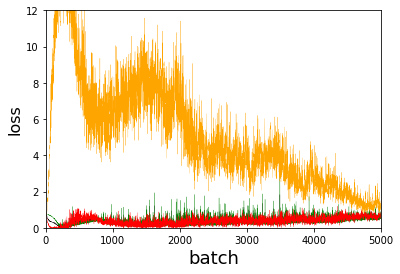

In [220]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 5000)
plt.ylim(0, 12)

plt.show()



#n_to_show = 10
#example_idx = np.random.choice(range(len(x_test)), n_to_show)
#example_images = x_test[example_idx]
#example_test   = y_test[example_idx]

#gan.generator()

#z_points = gan.discriminator.predict(example_images)
#print('z_points: ', z_points)
#reconst_images = AE.decoder.predict(z_points)
#print('reconstituted: {}'.format(reconst_images))

In [201]:
test_gen = gan.generator.predict([list(np.random.random(z_num))])
print(test_gen)
print(gan.discriminator.predict(test_gen))
print('Prob Sum: ', np.sum(test_gen))

[[-0.01123055  0.00792482 -0.00472485  0.01926836  0.01925022  0.03880921
   0.06427465  0.00533733  0.00663657  0.01958878  0.00632452  0.0160875
   0.01363848 -0.01098616  0.00472126  0.02013531  0.0325086   0.06336999
   0.06557898  0.01705048 -0.01801371 -0.01359054  0.04054878 -0.0169384
   0.01189579  0.072663    0.08333021  0.15131882  0.04134703  0.05476469
   0.02475159  0.06754696  0.02407375  0.0419841   0.06013798]]
[[0.58968204]]
Prob Sum:  1.0193834


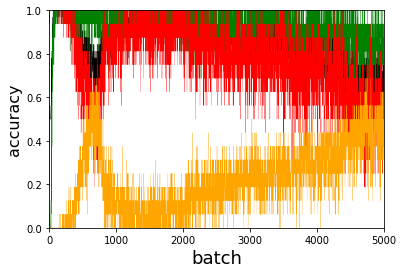

In [226]:

fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 5000)
plt.ylim(0, 1)


plt.show()